# ИТОГОВАЯ РАБОТА ПО МОДУЛЮ PYTHON

# 1. Загрузка файла HR.csv в pandas DataFrame

In [1]:
import pandas as pd

In [2]:
# Загрузка файла с помощью pandas с обработкой возможных отсутствующих значений
data = pd.read_csv('HR.csv', na_values=["NA", "NaN", "None", ""])

In [3]:
# Проверка наличия пропущенных значений
print(data.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [4]:
# Вывод первых пяти строк для проверки
print(data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

# 2. Расчет основных статистик (среднее, медиана, мода, мин/макс, сред.отклонение)

In [5]:
# Расчет основных статистик
stats = data.describe().T
# Мода
stats['mode'] = data.mode().iloc[0]  
# Медиана
stats['median'] = data.median()  

In [6]:
print(stats)

                         count        mean        std    min     25%     50%  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00   

                          75%    max  mode  median  
satisfaction_level       0.82    1.0   0.1    0.64  
last_evaluation          0.87    1.0  0.55    0.72  
number_project           5.00    7.0     4    4.00  
average_montly_hours   245.00  310.0   135  200.00  
time_spend_com

In [21]:
# Оставляем необходимые статистики в указанном порядке 
desired_order = ['mean', 'median', 'mode', 'min', 'max','std']
stats = stats[desired_order]
stats

,mean,median,mode,min,max,std
satisfaction_level,0.612834,0.64,0.1,0.09,1.0,0.248631
last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171169
number_project,3.803054,4.00,4,2.00,7.0,1.232592
average_montly_hours,201.050337,200.00,135,96.00,310.0,49.943099
time_spend_company,3.498233,3.00,3,2.00,10.0,1.460136
Work_accident,0.144610,0.00,0,0.00,1.0,0.351719
left,0.238083,0.00,0,0.00,1.0,0.425924
promotion_last_5years,0.021268,0.00,0,0.00,1.0,0.144281


# 3.	Расчет и визуализация корреляционной матрицы

Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 

In [12]:
# Выбираем количественные признаки из файла HR.csv
numeric_data = data[['satisfaction_level', 'last_evaluation', 'number_project', 
                     'average_montly_hours', 'time_spend_company']]

In [13]:
# Строим корреляционную матрицу на количественных признаках
correlation_matrix = numeric_data.corr()

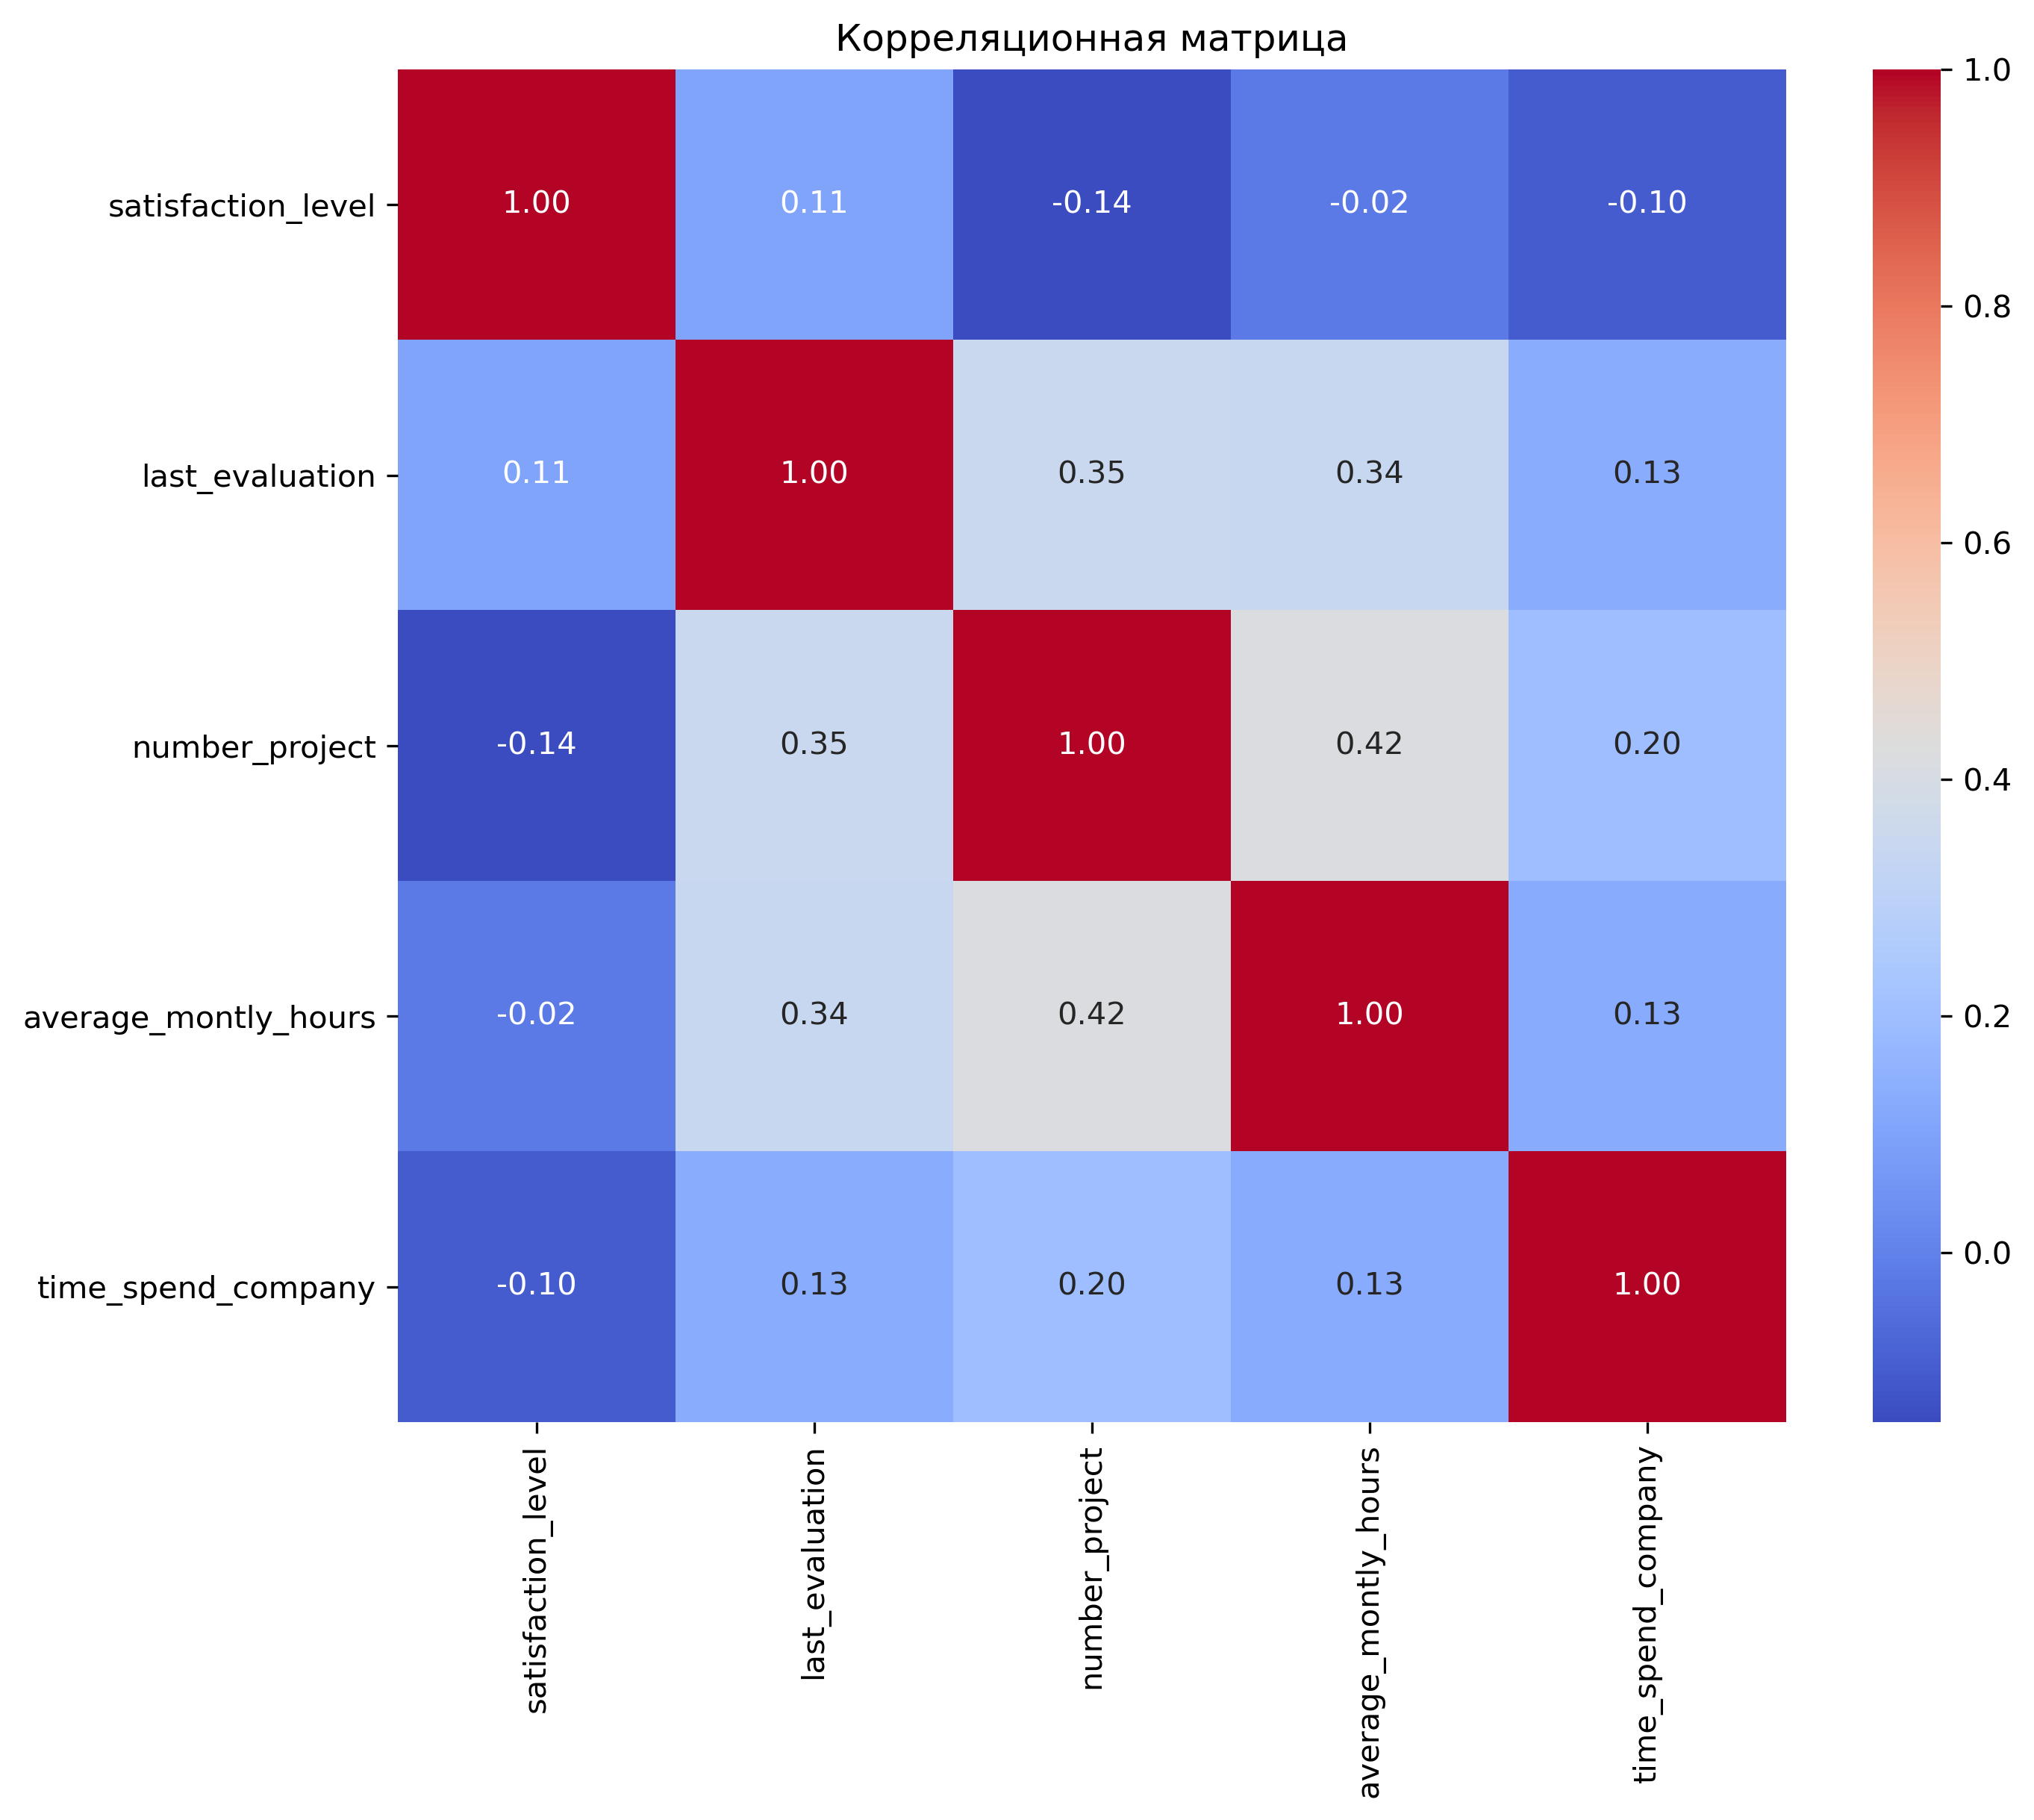

In [58]:
# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [22]:
# Преобразуем корреляционную матрицу в формат "длинной таблицы"
correlation_matrix_unstacked = correlation_matrix.unstack()

In [27]:
# Фильтруем, чтобы исключить корреляции переменных с самими собой
filtered_correlations = correlation_matrix_unstacked[
    correlation_matrix_unstacked.index.get_level_values(0) < correlation_matrix_unstacked.index.get_level_values(1)
]

# # Сортируем значения по убыванию модуля корреляции
sorted_correlations = filtered_correlations.loc[
    filtered_correlations.abs().sort_values(ascending=False).index
]

In [28]:
# Выводим две самые скоррелированные и две наименее скоррелированные переменные
print("Самые скоррелированные переменные:")
print(sorted_correlations[:2])  # Две самые высокие корреляции

print("\nНаименее скоррелированные переменные:")
print(sorted_correlations[-2:])  # Две самые низкие корреляции

Самые скоррелированные переменные:
average_montly_hours  number_project    0.417211
last_evaluation       number_project    0.349333
dtype: float64

Наименее скоррелированные переменные:
satisfaction_level    time_spend_company   -0.100866
average_montly_hours  satisfaction_level   -0.020048
dtype: float64


# 4. Количество сотрудников в каждом департаменте

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [21]:
# Подсчитываем количество сотрудников в каждом департаменте
department_counts = data['department'].value_counts()
print(department_counts)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


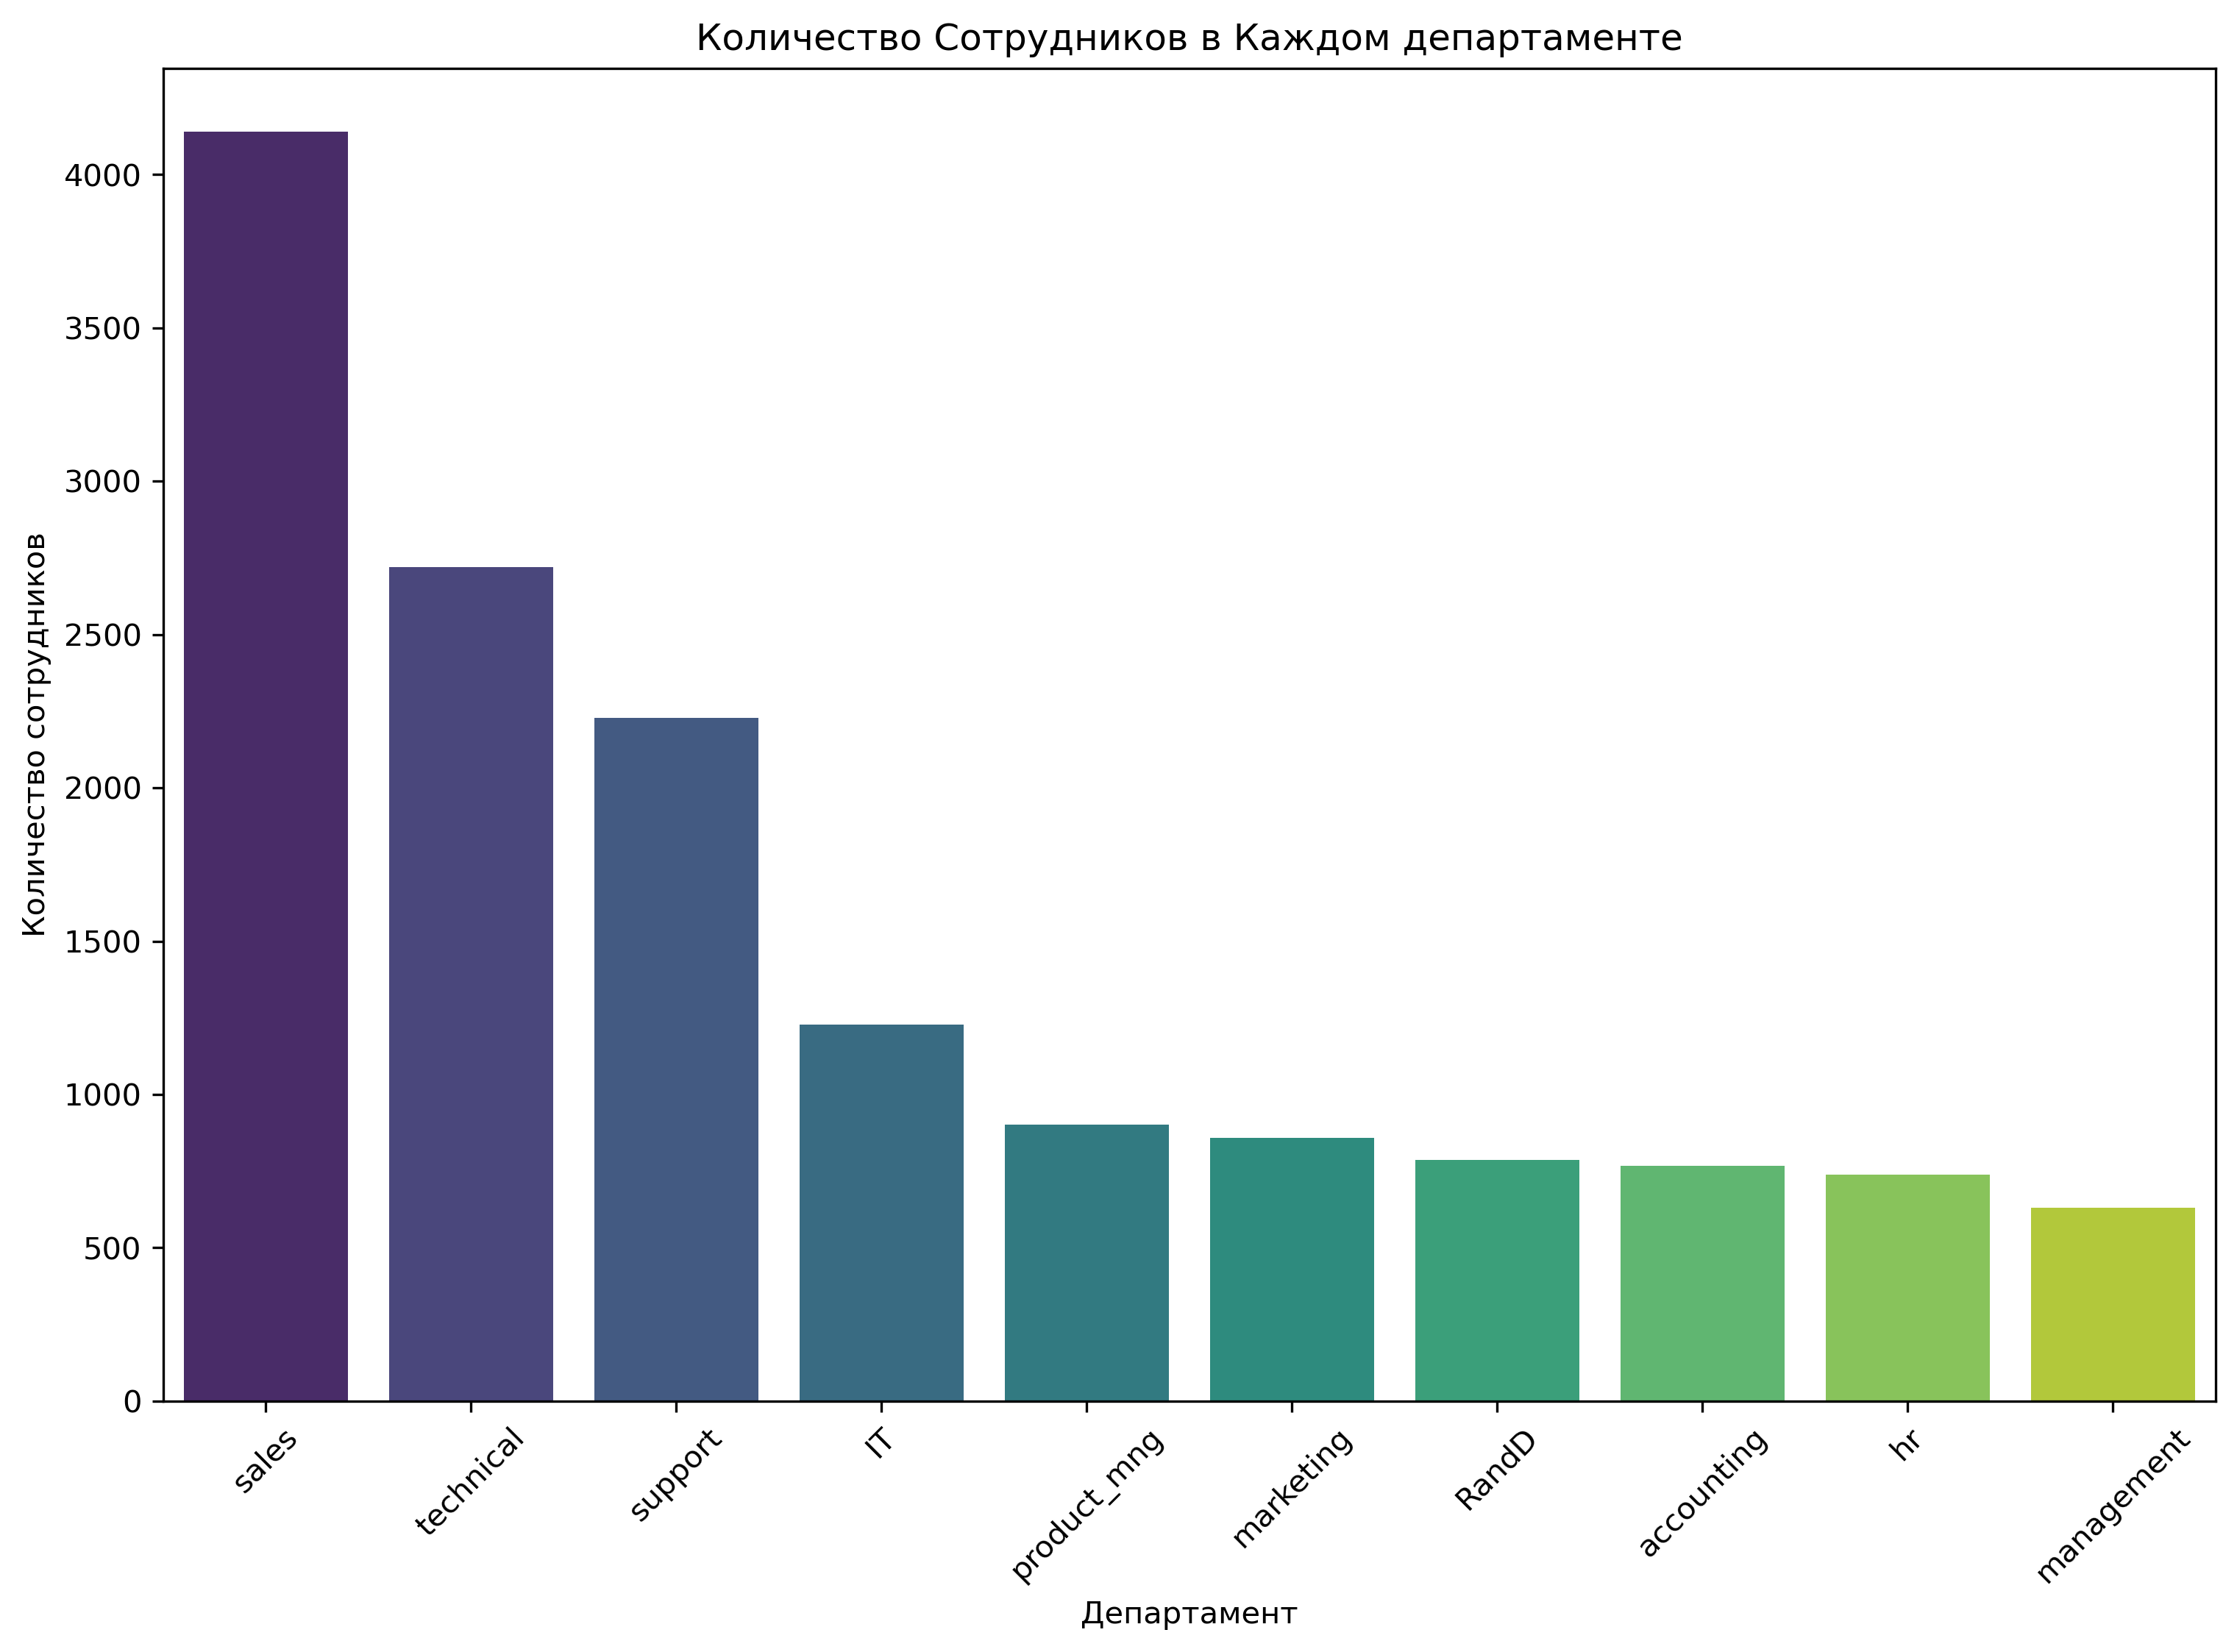

In [63]:
# Визуализируем полученный результат
plt.figure(figsize=(12, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Количество Сотрудников в Каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.show()

# 5. Распределение сотрудников по зарплатам

Показать распределение сотрудников по зарплатам

In [23]:
# Строим распределение сотрудников по зарплатам
salary_counts = data['salary'].value_counts()
print(salary_counts)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


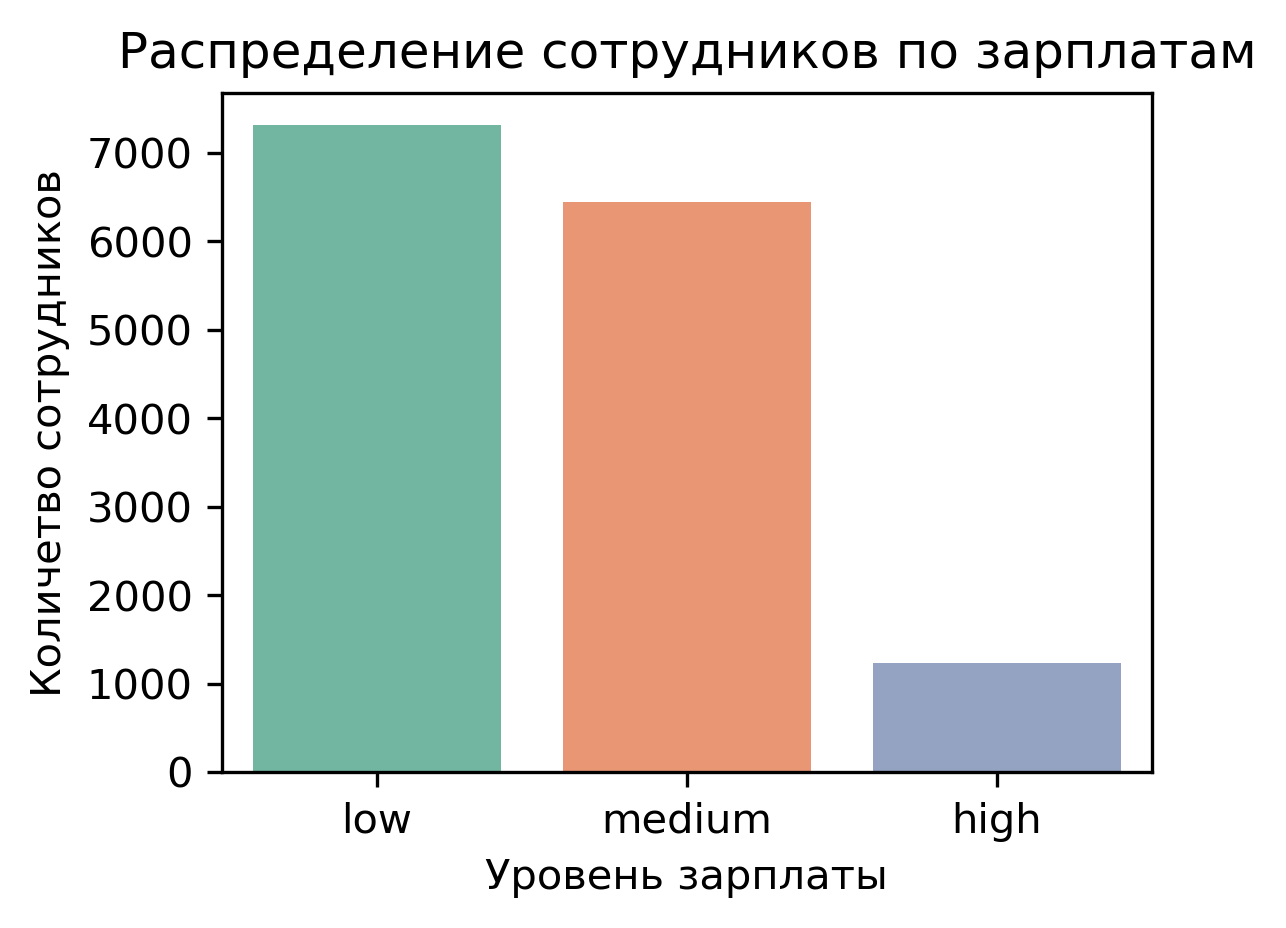

In [61]:
# Визуализируем полученный результат
plt.figure(figsize=(4, 3))
sns.barplot(x=salary_counts.index, y=salary_counts.values, palette='Set2')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количетво сотрудников')
plt.show()

# 6. Распределение сотрудников по зарплатам в каждом департаменте

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [35]:
# Группируем данные по департаменту и зарплате
salary_by_department = data.groupby(['department', 'salary']).size().unstack()
print(salary_by_department)

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


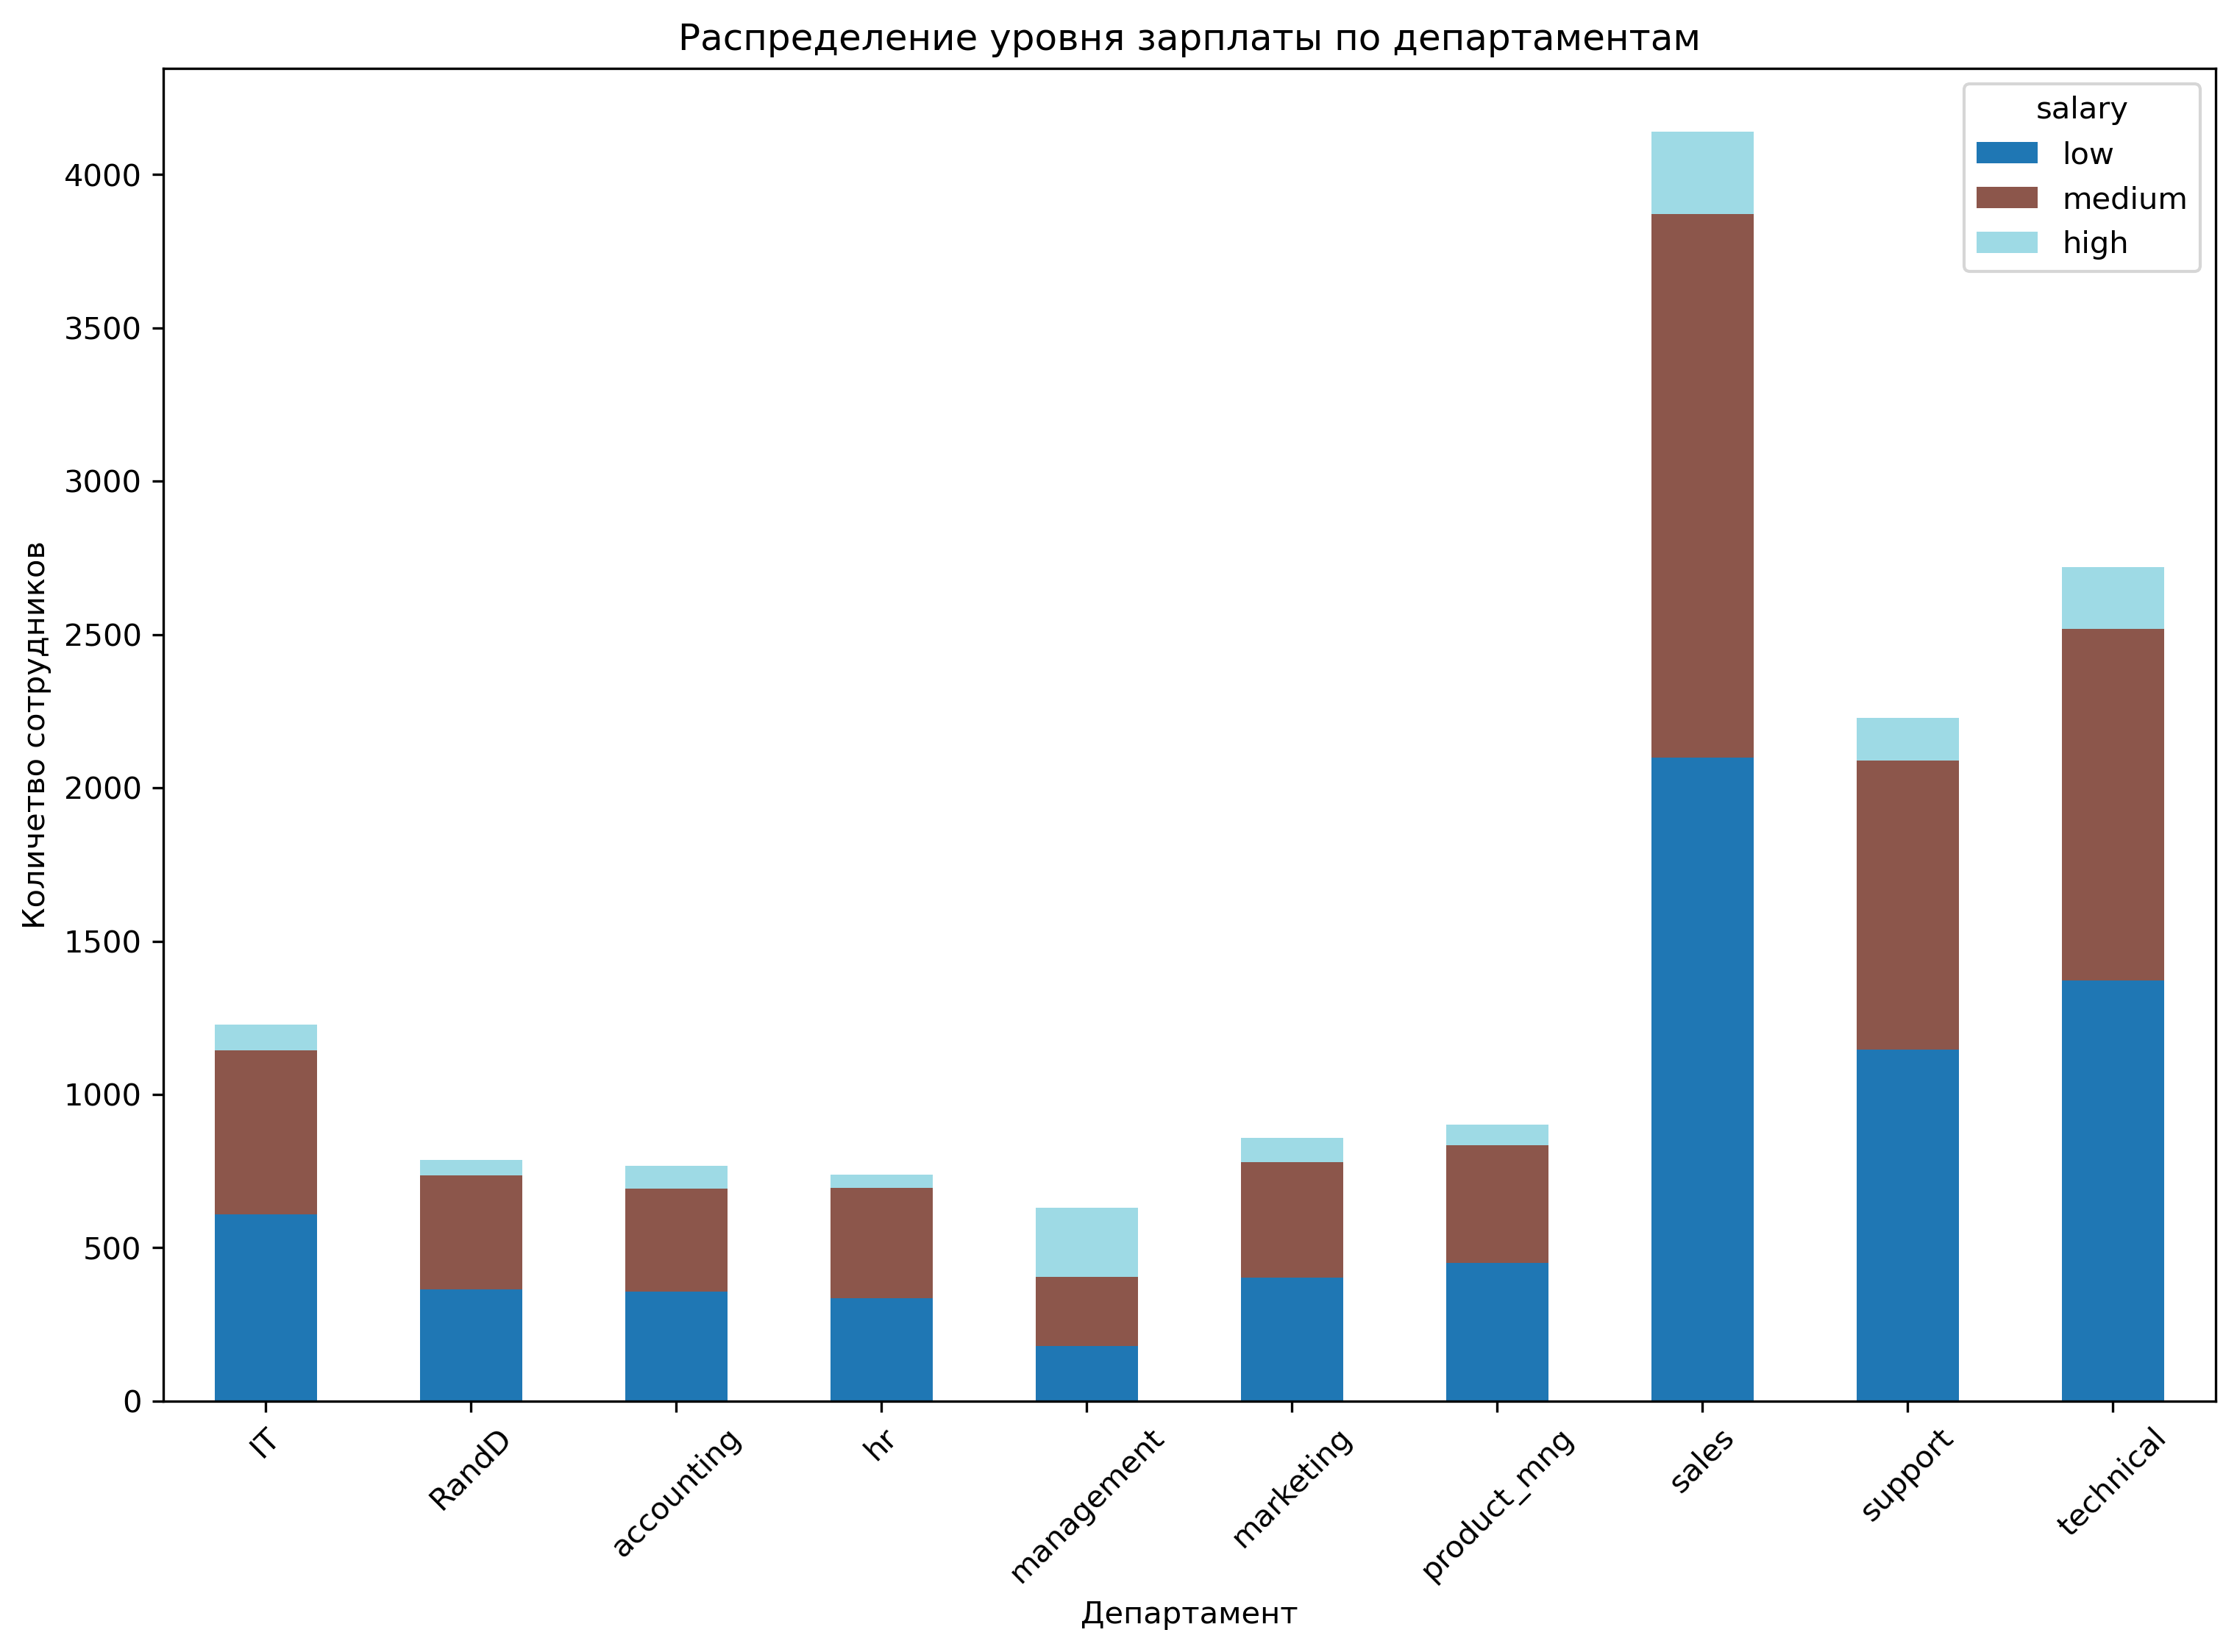

In [64]:
# Задаем порядок категорий зарплат
salary_order = ['low', 'medium', 'high']
salary_by_department = salary_by_department[salary_order]
# Визуализируем полученный результат
salary_by_department.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Распределение уровня зарплаты по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количетво сотрудников')
plt.xticks(rotation=45)
plt.show()

# 7. Проверка гипотезы о взаимосвязи времени, проведенном на работе с уровнем зарплаты

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Нулевая гипотеза (H0): Среднее время работы сотрудников с высоким окладом равно среднему времени работы сотрудников с низким окладом.
Альтернативная гипотеза (H1): Среднее время работы сотрудников с высоким окладом не равно среднему времени работы сотрудников с низким окладом.

In [67]:
# Используем t-тест для сравнения средних значений
from scipy.stats import ttest_ind

# Разделяем данные по уровню зарплаты
high_salary = data[data['salary'] == 'high']['average_montly_hours']
low_salary = data[data['salary'] == 'low']['average_montly_hours']

In [68]:
# T-тест
t_stat, p_value = ttest_ind(high_salary, low_salary)

# Выводим результаты теста
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Интерпретация результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Среднее время работы различается.")
else:
    print("Не отвергаем нулевую гипотезу: Среднее время работы одинаково.")

T-statistic: -0.7288680398062308, P-value: 0.4661023478267259
Не отвергаем нулевую гипотезу: Среднее время работы одинаково.


# 8. Показатели среди уволившихся и не уволившихся сотрудников


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

a. Доля сотрудников с повышением за последние 5 лет:

In [69]:
promotion_rate_left = data[data['left'] == 1]['promotion_last_5years'].mean()
promotion_rate_stayed = data[data['left'] == 0]['promotion_last_5years'].mean()

print(f"Доля сотрудников с повышением среди уволившихся: {promotion_rate_left:.2%}")
print(f"Доля сотрудников с повышением среди оставшихся: {promotion_rate_stayed:.2%}")

Доля сотрудников с повышением среди уволившихся: 0.53%
Доля сотрудников с повышением среди оставшихся: 2.63%


b. Средняя степень удовлетворенности:


In [70]:
avg_satisfaction_left = data[data['left'] == 1]['satisfaction_level'].mean()
avg_satisfaction_stayed = data[data['left'] == 0]['satisfaction_level'].mean()

print(f"Средняя удовлетворенность среди уволившихся: {avg_satisfaction_left:.2f}")
print(f"Средняя удовлетворенность среди оставшихся: {avg_satisfaction_stayed:.2f}")

Средняя удовлетворенность среди уволившихся: 0.44
Средняя удовлетворенность среди оставшихся: 0.67


c. Среднее количество проектов:


In [71]:
avg_projects_left = data[data['left'] == 1]['number_project'].mean()
avg_projects_stayed = data[data['left'] == 0]['number_project'].mean()

print(f"Среднее количество проектов среди уволившихся: {avg_projects_left:.2f}")
print(f"Среднее количество проектов среди оставшихся: {avg_projects_stayed:.2f}")

Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди оставшихся: 3.79


In [ ]:
9. Модель LDA

Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

In [73]:
# Удаляем категориальные признаки 'department' и 'salary'
X = data.drop(columns=['left', 'department', 'salary'])
y = data['left']

In [74]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Обучаем модель LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [76]:
# Получаем предсказание
y_pred = lda.predict(X_test)

In [77]:
# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7533333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



Заключение:

Данная модель показывает хорошую точность предсказания для оставшихся в компании сотрудников, но плохо работает на уволившихся сотрудниках. Скорее всего это связано с несбалансированностью данных, посколкьу отсавшихся в компании сотрудников гораздо больше. 

In [79]:
# Количество оставшихся в компании сотрудников
stayed = data[data['left'] == 0].shape[0]

# Количество уволившихся сотрудников
left = data[data['left'] == 1].shape[0]

print("Количество сотрудников, которые остались:", stayed)
print("Количество сотрудников, которые уволились:", left)

Количество сотрудников, которые остались: 11428
Количество сотрудников, которые уволились: 3571
